
## Projet Fin Module - nalyse des publications scientifiques avec l'API Scopus
##### Réalisé Par :

> Zaidane najat


> Sadok Mohammed


> Sejjari Soufiane


## Introduction

Ce notebook présente un script Python conçu pour récupérer des informations sur les publications scientifiques à partir de l'API Scopus et pour les analyser et les visualiser.

## API Elsevier

L'API Elsevier fournit un accès aux données bibliographiques et aux informations sur les auteurs et les affiliations. Elle est documentée ici : https://dev.elsevier.com/api_docs.html.

## Clé API

La clé API utilisée pour ce projet est la suivante :

0e7734ba689cfd558d5823687037e4a5

In [ ]:
pip install requests pandas matplotlib numpy seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from elsapy.elsclient import ElsClient
from elsapy.elsdoc import FullDoc
from elsapy.elssearch import ElsSearch
import requests, json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Récuperation et Extraction des données depuis l'API


In [ ]:
import requests
import pandas as pd
def fetch_scopus_data(api_key, keyword, start_year, end_year, max_results=100):
    base_url = "https://api.elsevier.com/content/search/scopus"
    query = f'PUBYEAR > {start_year - 1} AND PUBYEAR < {end_year + 1} AND (TITLE("{keyword}"))'
    params = {
        "query": query,
        "apiKey": api_key,
        "count": 25,
        "start": 0
    }

    all_results = []
    while params["start"] < max_results:
        response = requests.get(base_url, params=params)
        if response.status_code == 200:
            data = response.json()
            entries = data.get('search-results', {}).get('entry', [])
            all_results.extend(entries)
            if len(entries) < 25:  # If less than 25 entries, we have reached the end
                break
            params["start"] += 25
        else:
            print(f"Error: {response.status_code}, {response.text}")
            break

    return all_results

def extract_important_fields(entries, keyword):
    extracted_data = []

    for entry in entries:
        year = entry.get('prism:coverDate', '').split('-')[0]  # Extract year from coverDate
        title = entry.get('dc:title', '')
        authors = entry.get('dc:creator', '')
        publication_name = entry.get('prism:publicationName', '')
        publication_date = entry.get('prism:coverDate', '')
        doi = entry.get('prism:doi', '')
        citation_count = entry.get('citedby-count', '0')

        extracted_data.append({
            'Year': year,
            'Title': title,
            'Authors': authors,
            'Publication Name': publication_name,
            'Publication Date': publication_date,
            'DOI': doi,
            'Citation Count': citation_count,
            'Keyword': keyword
        })

    return extracted_data

def main(): # boucle sur chaque keyword et année pour récupération des données
    api_key = "0e7734ba689cfd558d5823687037e4a5"
    keywords = ["NLP", "Artificial Intelligence", "Machine Learning"]
    start_year = 2015
    end_year = 2024
    max_results_per_year = 1000  # Maximum number of results per year per keyword

    all_data = []

    for keyword in keywords:
        print(f"Fetching data for keyword: {keyword}")
        for year in range(start_year, end_year + 1):
            print(f"Fetching data for year: {year}")
            entries = fetch_scopus_data(api_key, keyword, year, year, max_results_per_year)
            if entries:
                extracted_data = extract_important_fields(entries, keyword)
                all_data.extend(extracted_data)
            else:
                print(f"No data fetched for {keyword} in {year}")

    df = pd.DataFrame(all_data)
    df.to_csv("scopus_data_All.csv", index=False)
    print("Data saved to scopus_data.csv")

if __name__ == "__main__":
    main()


Fetching data for keyword: NLP
Fetching data for year: 2015
Fetching data for year: 2016
Fetching data for year: 2017
Fetching data for year: 2018
Fetching data for year: 2019
Fetching data for year: 2020
Fetching data for year: 2021
Fetching data for year: 2022
Fetching data for year: 2023
Fetching data for year: 2024
Fetching data for keyword: Artificial Intelligence
Fetching data for year: 2015
Fetching data for year: 2016
Fetching data for year: 2017
Fetching data for year: 2018
Fetching data for year: 2019
Fetching data for year: 2020
Fetching data for year: 2021
Fetching data for year: 2022
Fetching data for year: 2023
Fetching data for year: 2024
Fetching data for keyword: Machine Learning
Fetching data for year: 2015
Fetching data for year: 2016
Fetching data for year: 2017
Fetching data for year: 2018
Fetching data for year: 2019
Fetching data for year: 2020
Fetching data for year: 2021
Fetching data for year: 2022
Fetching data for year: 2023
Fetching data for year: 2024
Data

## Analyse et Nettoyage des Données

In [ ]:
df=pd.read_csv('scopus_data_all.csv')
df.head()

Year                                              Title    Authors  \
0  2015         Scaling NLP algorithms to meet high demand  Stokes C.   
1  2015  Molecular characterization and periplasmic exp...  Hamedi J.   
2  2015  Mass Spectrometry of Single GABAergic Somatic ...   Konop C.   
3  2015  NLP based congestive heart failure case findin...    Wang Y.   
4  2015  Blending water- and nutrient-source wastewater...    Park S.   

                                    Publication Name Publication Date  \
0  Proceedings - 2015 IEEE International Conferen...       2015-12-22   
1                             Annals of Microbiology       2015-12-01   
2  Journal of the American Society for Mass Spect...       2015-12-01   
3       International Journal of Medical Informatics       2015-12-01   
4                             Bioresource Technology       2015-12-01   

                              DOI  Citation Count Keyword  
0    10.1109/BigData.2015.7364095               1     NLP  
1       10.1007/s13213-015-1043-z               1     NLP  
2       10.1007/s13361-015-1177-z               6     NLP  
3  10.1016/j.ijmedinf.2015.06.007              31     NLP  
4  10.1016/j.biortech.2015.09.038              17     NLP

In [ ]:
# nombre de total des valeurs manquantes
df.isnull().sum().sum()

3068

Year: 0 les valeurs manquantes
Title: 0 les valeurs manquantes
Authors: 564 les valeurs manquantes
Publication Name: 4 les valeurs manquantes
Publication Date: 0 les valeurs manquantes
DOI: 2500 les valeurs manquantes
Citation Count: 0 les valeurs manquantes
Keyword: 0 les valeurs manquantes


<Axes: title={'center': 'Nombre de valeurs manquantes par colonne'}>

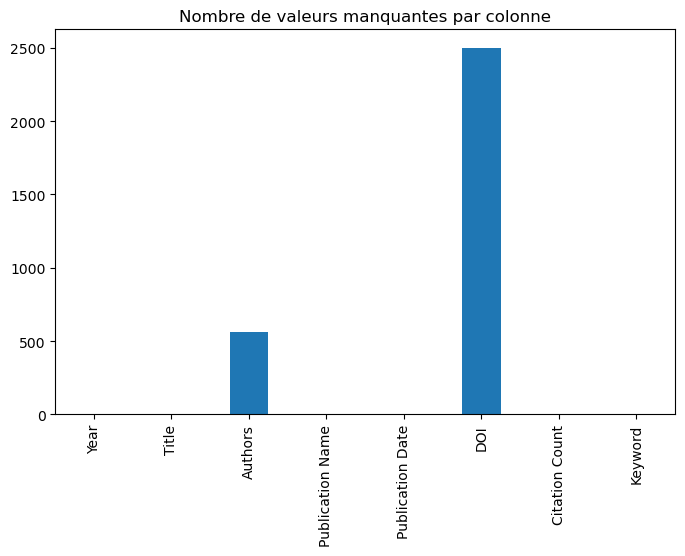

In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum()} les valeurs manquantes")
df.isnull().sum().plot(kind='bar', title='Nombre des valeurs manquantes par colonne', figsize=(8, 5))

In [ ]:
# replacement des valeurs manquantes par des valeurs par défaut
df['Authors']=df['Authors'].fillna('Unknown')
# suppression des lignes avec des valeurs manquantes
df = df.dropna()
print(df.isnull().sum().sum(), df.shape)


0 (19875, 8)


In [ ]:
df.to_csv('scopus_data_all_cleaned.csv', index=False)

## Traitement et Visualisation des données



In [ ]:
# chargement du dataset
df=pd.read_csv('scopus_data_all_cleaned.csv')
df.head()


Year                                              Title    Authors  \
0  2015         Scaling NLP algorithms to meet high demand  Stokes C.   
1  2015  Molecular characterization and periplasmic exp...  Hamedi J.   
2  2015  Mass Spectrometry of Single GABAergic Somatic ...   Konop C.   
3  2015  NLP based congestive heart failure case findin...    Wang Y.   
4  2015  Blending water- and nutrient-source wastewater...    Park S.   

                                    Publication Name Publication Date  \
0  Proceedings - 2015 IEEE International Conferen...       2015-12-22   
1                             Annals of Microbiology       2015-12-01   
2  Journal of the American Society for Mass Spect...       2015-12-01   
3       International Journal of Medical Informatics       2015-12-01   
4                             Bioresource Technology       2015-12-01   

                              DOI  Citation Count Keyword  
0    10.1109/BigData.2015.7364095               1     NLP  
1       10.1007/s13213-015-1043-z               1     NLP  
2       10.1007/s13361-015-1177-z               6     NLP  
3  10.1016/j.ijmedinf.2015.06.007              31     NLP  
4  10.1016/j.biortech.2015.09.038              17     NLP

In [ ]:
# informations sur dataset
df.info()


In [ ]:
# analyse statistique
df.describe()


Year  Citation Count
count  19875.000000    19875.000000
mean    2020.021686       21.429836
std        2.753644       82.575112
min     2015.000000        0.000000
25%     2018.000000        0.000000
50%     2020.000000        4.000000
75%     2022.000000       16.000000
max     2024.000000     5129.000000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données depuis le fichier CSV
df = pd.read_csv('scopus_data_all_cleaned.csv')

def analyseDonne(keyword):
    # Filtrer les données pour le mot-clé spécifié
    df_keyword = df[df['Keyword'] == keyword]

    # Afficher les premières lignes du dataframe
    print(f"Aperçu des données pour {keyword}:")
    print(df_keyword.head(1))

    # Analyses statistiques
    total_publications = df_keyword.shape[0]
    total_citations = df_keyword['Citation Count'].sum()
    avg_citations_per_publication = df_keyword['Citation Count'].mean()
    max_citations = df_keyword['Citation Count'].max()
    top_publications = df_keyword[df_keyword['Citation Count'] == max_citations]

    print(f"\nStatistiques pour {keyword}:")
    print(f"Nombre total de publications: {total_publications}")
    print(f"Nombre total de citations: {total_citations}")
    print(f"Citations moyennes par publication: {avg_citations_per_publication:.2f}")
    print(f"Publication(s) avec le plus de citations:")
    print(top_publications)

    # Visualisation de la répartition des publications par année
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Year', data=df_keyword)
    plt.title(f'Répartition des publications par année pour {keyword}')
    plt.xlabel('Année')
    plt.ylabel('Nombre de publications')
    plt.show()

    # Distribution des citations par publication
    plt.figure(figsize=(10, 6))
    sns.histplot(df_keyword['Citation Count'], bins=30)
    plt.title(f'Distribution des citations par publication pour {keyword}')
    plt.xlabel('Nombre de citations')
    plt.ylabel('Nombre de publications')
    plt.show()

    # Répartition des publications par auteur
    authors_series = df_keyword['Authors'].str.split(',').explode().value_counts()
    top_authors = authors_series.head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_authors.values, y=top_authors.index)
    plt.title(f'Top 10 des auteurs pour {keyword}')
    plt.xlabel('Nombre de publications')
    plt.ylabel('Auteurs')
    plt.show()

    # Calcul de la corrélation entre le nombre de citations et les années de publication
    correlation = df_keyword[['Year', 'Citation Count']].corr().iloc[0, 1]
    print(f"\nCorrélation entre le nombre de citations et les années de publication pour {keyword}: {correlation:.2f}")

    # Analyse des publications avec le plus de citations
    print(f"\nPublications avec le plus de citations pour {keyword}:")
    print(df_keyword[df_keyword['Citation Count'] > avg_citations_per_publication])



Aperçu des données pour NLP:
   Year                                              Title    Authors  \
0  2015         Scaling NLP algorithms to meet high demand  Stokes C.   
1  2015  Molecular characterization and periplasmic exp...  Hamedi J.   
2  2015  Mass Spectrometry of Single GABAergic Somatic ...   Konop C.   
3  2015  NLP based congestive heart failure case findin...    Wang Y.   
4  2015  Blending water- and nutrient-source wastewater...    Park S.   

                                    Publication Name Publication Date  \
0  Proceedings - 2015 IEEE International Conferen...       2015-12-22   
1                             Annals of Microbiology       2015-12-01   
2  Journal of the American Society for Mass Spect...       2015-12-01   
3       International Journal of Medical Informatics       2015-12-01   
4                             Bioresource Technology       2015-12-01   

                              DOI  Citation Count Keyword  
0    10.1109/BigData.2015.7364095

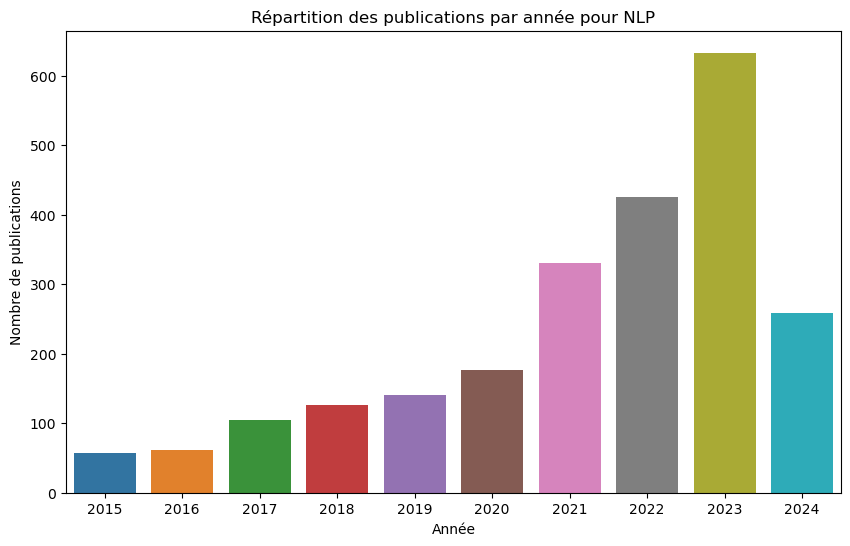

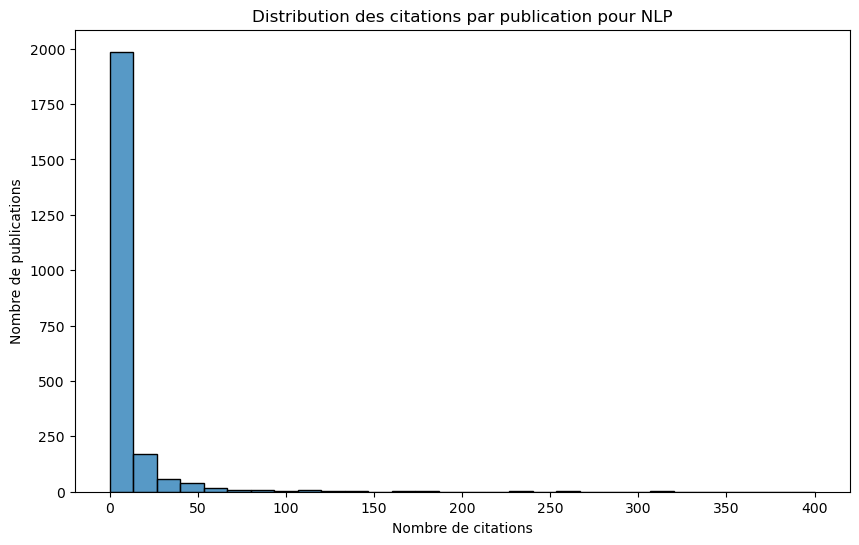

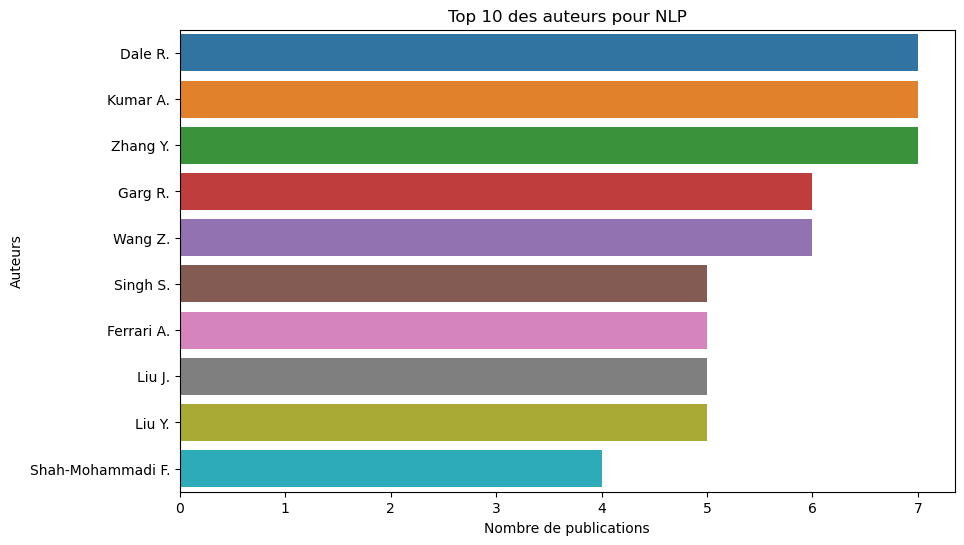


Corrélation entre le nombre de citations et les années de publication pour NLP: -0.30

Publications avec le plus de citations pour NLP:
      Year                                              Title  \
3     2015  NLP based congestive heart failure case findin...   
4     2015  Blending water- and nutrient-source wastewater...   
6     2015  Change impact analysis for Natural Language re...   
10    2015  An RLP23-SOBIR1-BAK1 complex mediates NLP-trig...   
13    2015  Integrating word embeddings and traditional NL...   
...    ...                                                ...   
2034  2023  A Machine Learning Approach for the NLP-Based ...   
2035  2023  A Framework for Smart Home System with Voice C...   
2036  2023  Knowledge graph enrichment from clinical narra...   
2055  2023  Studying Online Travel Reviews related to tour...   
2314  2024  Smarter people analytics with organizational t...   

                    Authors  \
3                   Wang Y.   
4                   

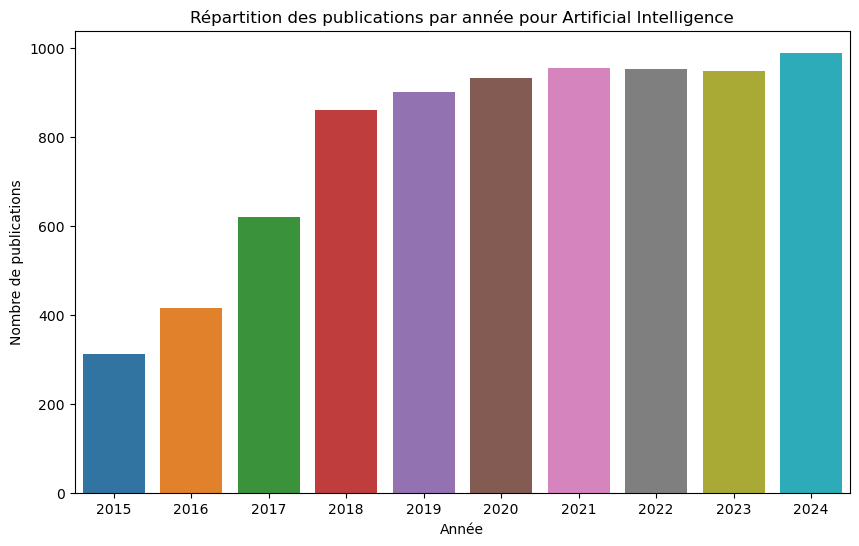

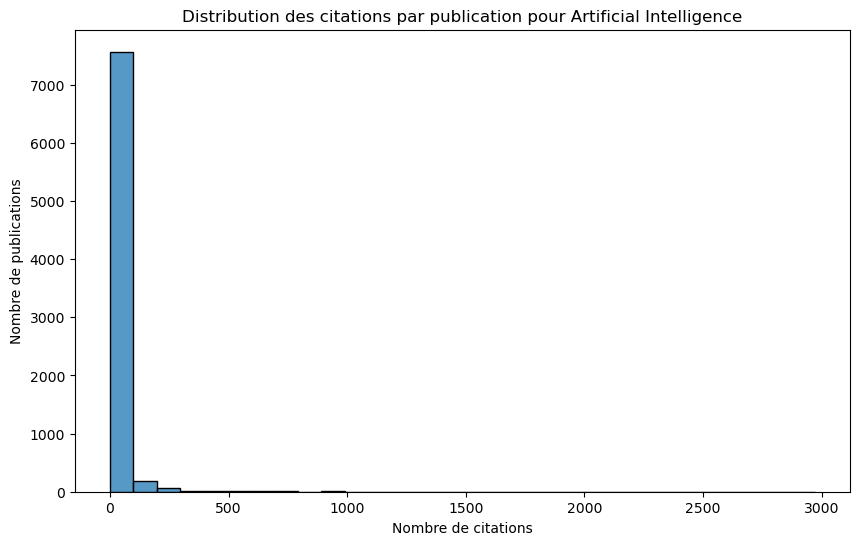

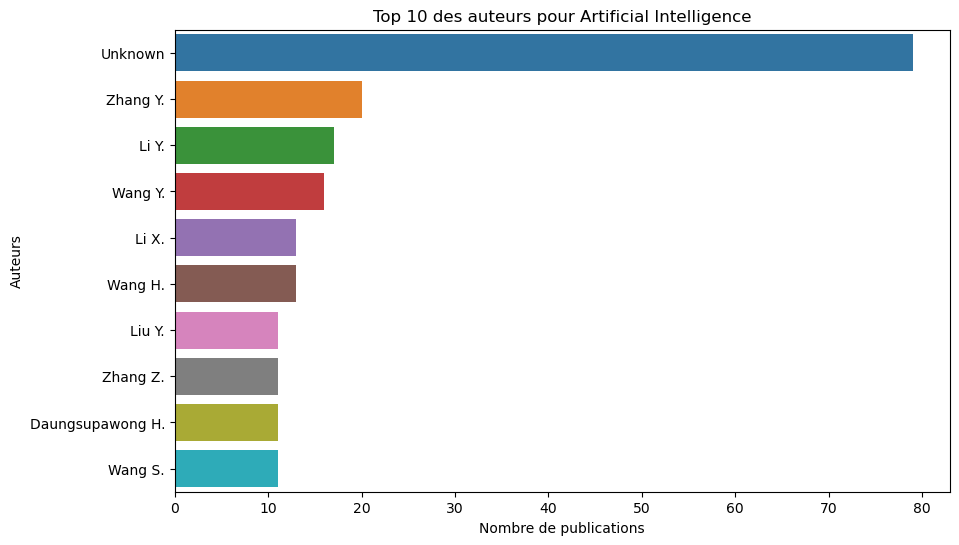


Corrélation entre le nombre de citations et les années de publication pour Artificial Intelligence: -0.17

Publications avec le plus de citations pour Artificial Intelligence:
       Year                                              Title  \
2316   2015  Recent advances on artificial intelligence and...   
2317   2015  Artificial intelligence for detecting preterm ...   
2322   2015  A review of intelligent driving style analysis...   
2325   2015  Research priorities for robust and beneficial ...   
2326   2015  Control strategies and artificial intelligence...   
...     ...                                                ...   
9144   2023  Revolutionizing healthcare: the role of artifi...   
9172   2023  Best humans still outperform artificial intell...   
9184   2023  Considerations for addressing bias in artifici...   
10095  2024  Exploring the implementation of artificial int...   
10096  2024  Leaders, practitioners and scientists' awarene...   

              Authors         

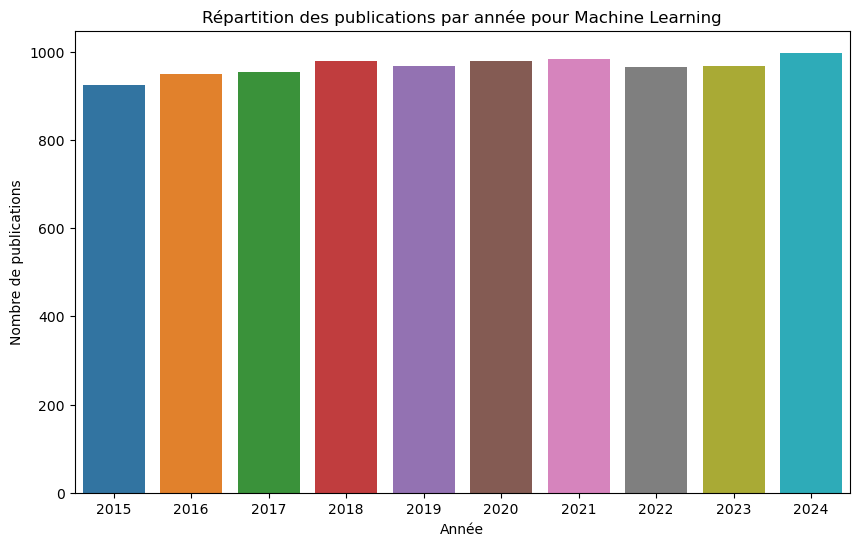

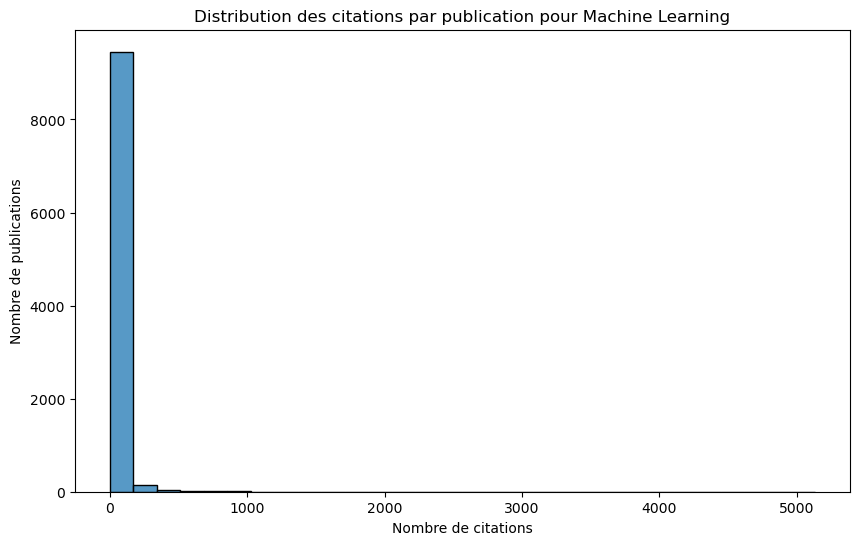

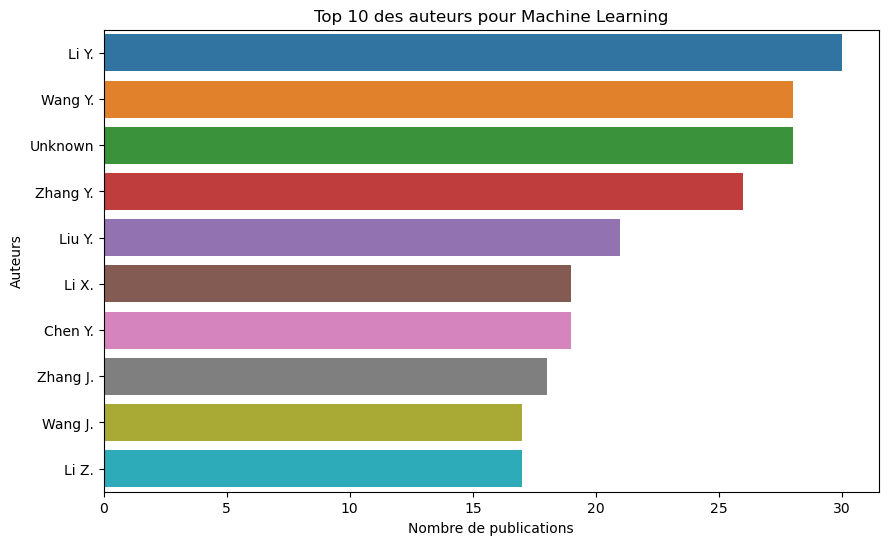


Corrélation entre le nombre de citations et les années de publication pour Machine Learning: -0.21

Publications avec le plus de citations pour Machine Learning:
       Year                                              Title  \
10209  2015  CAMELOT: A machine learning approach for Coars...   
10211  2015  A comprehensive evaluation of air pollution pr...   
10213  2015  A global prediction of seafloor sediment poros...   
10215  2015  Prediction of Synergism from Chemical-Genetic ...   
10217  2015  Traffic forecasting in complex urban networks:...   
...     ...                                                ...   
17758  2022  Prediction of type 2 diabetes using genome-wid...   
17766  2022  A Review of Machine Learning for Near-Infrared...   
17874  2022  Sepsis biomarkers and diagnostic tools with a ...   
17904  2022  Dementia Detection from Speech Using Machine L...   
18602  2023  Hand medical monitoring system based on machin...   

               Authors                      

In [ ]:
# Analyse des données pour chaque mot-clé
for keyword in df['Keyword'].unique():
    analyseDonne(keyword)


In [ ]:
def citation_perYear(keyword):
    # Filtrer les données pour le mot-clé spécifié
    df_keyword = df[df['Keyword'] == keyword]

    # Calculer le nombre de citations par année
    citations_per_year = df_keyword.groupby('Year')['Citation Count'].sum().reset_index()

    # Afficher le nombre de citations par année
    print(f"\nNombre de citations par année pour {keyword}:")
    print(citations_per_year)

    # Visualisation du nombre de citations par année
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Year', y='Citation Count', data=citations_per_year)
    plt.title(f'Nombre de citations par année pour {keyword}')
    plt.xlabel('Année')
    plt.ylabel('Nombre de citations')
    plt.show()



Nombre de citations par année pour NLP:
   Year  Citation Count
0  2015            1301
1  2016            1615
2  2017            3009
3  2018            2022
4  2019            1739
5  2020            3081
6  2021            2862
7  2022            2113
8  2023            1163
9  2024              41


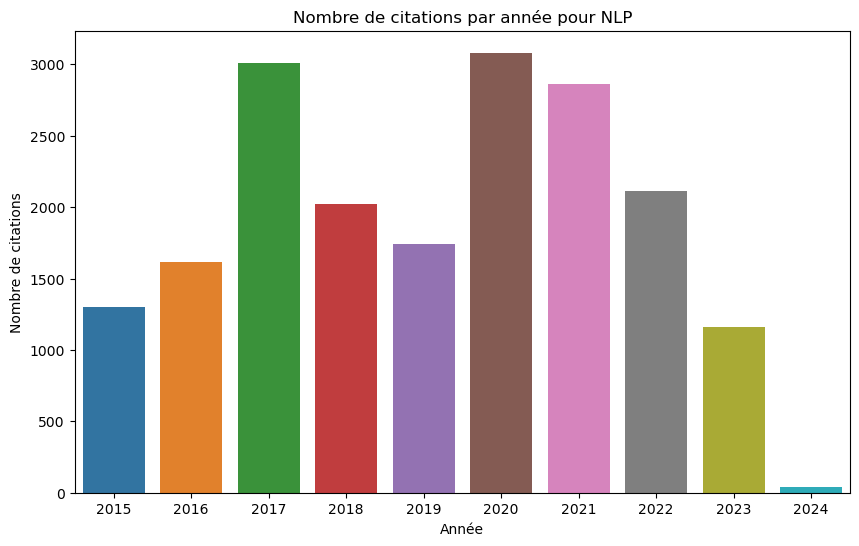


Nombre de citations par année pour Artificial Intelligence:
   Year  Citation Count
0  2015           10414
1  2016           10807
2  2017           24206
3  2018           42495
4  2019           28972
5  2020           25559
6  2021           18735
7  2022            9373
8  2023            1897
9  2024             393


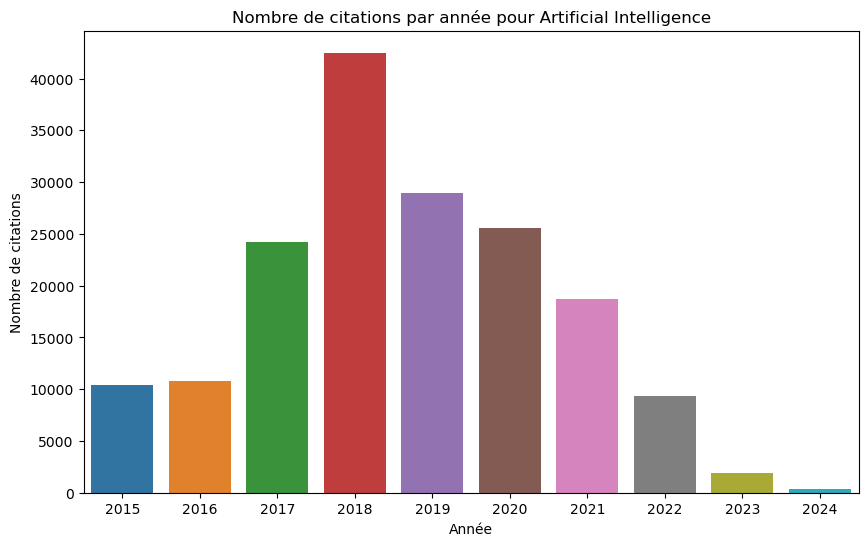


Nombre de citations par année pour Machine Learning:
   Year  Citation Count
0  2015           50608
1  2016           43539
2  2017           47782
3  2018           35227
4  2019           26780
5  2020           11871
6  2021           11064
7  2022            5817
8  2023            1038
9  2024             395


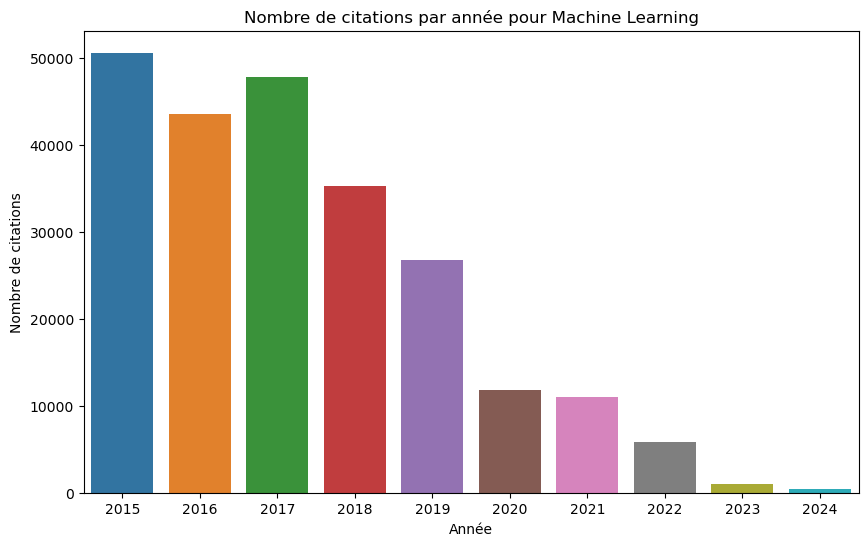

In [ ]:
# Nombre de citations par année pour chaque mot-clé
for keyword in df['Keyword'].unique():
    citation_perYear(keyword)

Coefficients du modèle de régression :
Intercept : 11865.57
Pente : -5.86
Corrélation : -0.97


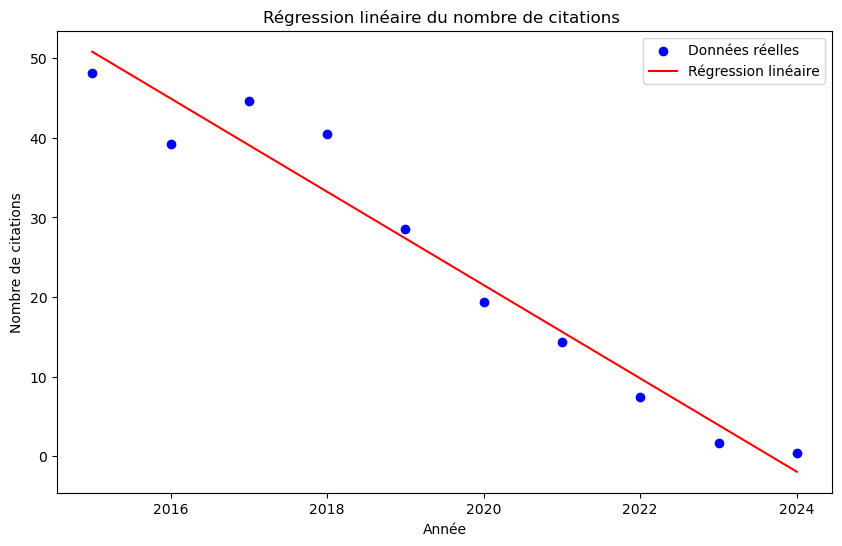

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt

# La régression linéaire et la corrélation entre le nombre de citations total et les années de publication
df_regression = df.groupby('Year')['Citation Count'].mean().reset_index()
# Effectuer la régression linéaire
X = df_regression['Year'].values.reshape(-1, 1)
y = df_regression['Citation Count'].values.reshape(-1, 1)
regression_model = LinearRegression()
regression_model.fit(X, y)
# Calculer les citations prédites pour chaque année
predicted_citations = regression_model.predict(X)
# Calculer la corrélation entre le nombre de citations moyen et les années de publication
correlation = np.corrcoef(df_regression['Year'], df_regression['Citation Count'])[0, 1]
# Afficher les coefficients du modèle de régression et la corrélation
print("Coefficients du modèle de régression :")
print(f"Intercept : {regression_model.intercept_[0]:.2f}")
print(f"Pente : {regression_model.coef_[0][0]:.2f}")
print(f"Corrélation : {correlation:.2f}")
# Visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='Données réelles')
plt.plot(X, predicted_citations, color='r', label='Régression linéaire')
plt.title(f"Régression linéaire du nombre de citations ")
plt.xlabel('Année')
plt.ylabel('Nombre de citations')
plt.legend()
plt.show()


Une corrélation de -0.97 est trés forte, ce qui signifie que les années de publication et le nombre de citations sont légèrement corrélés de manière négative

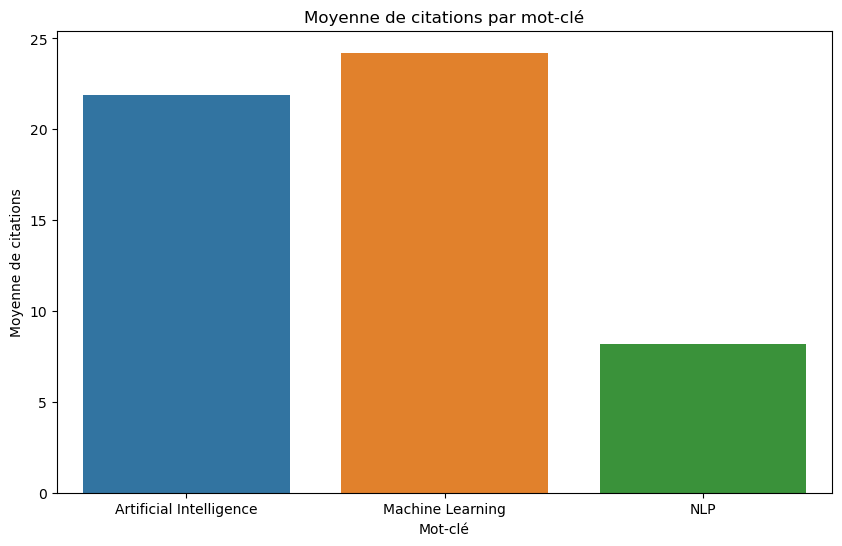

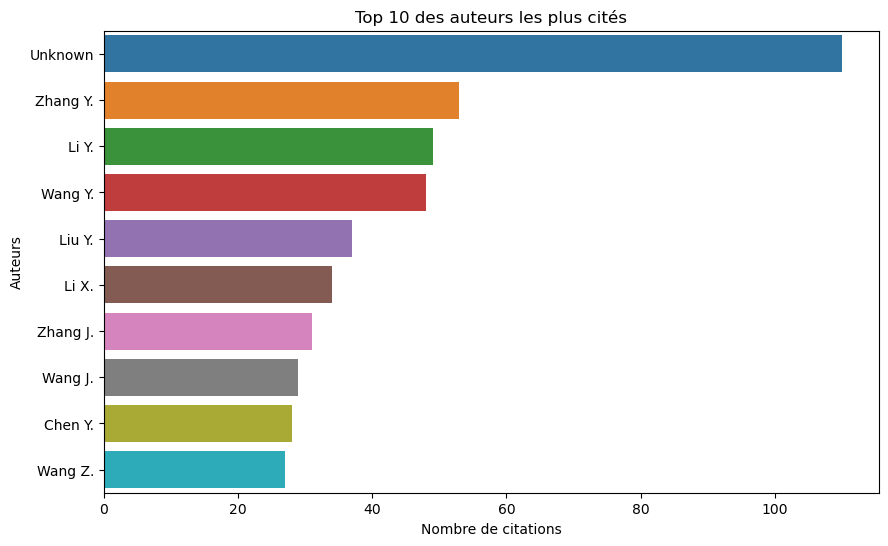

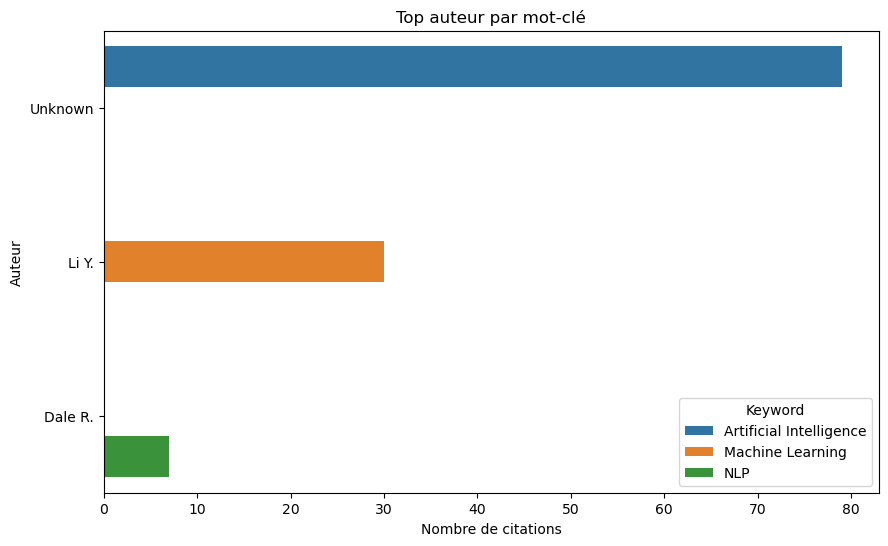

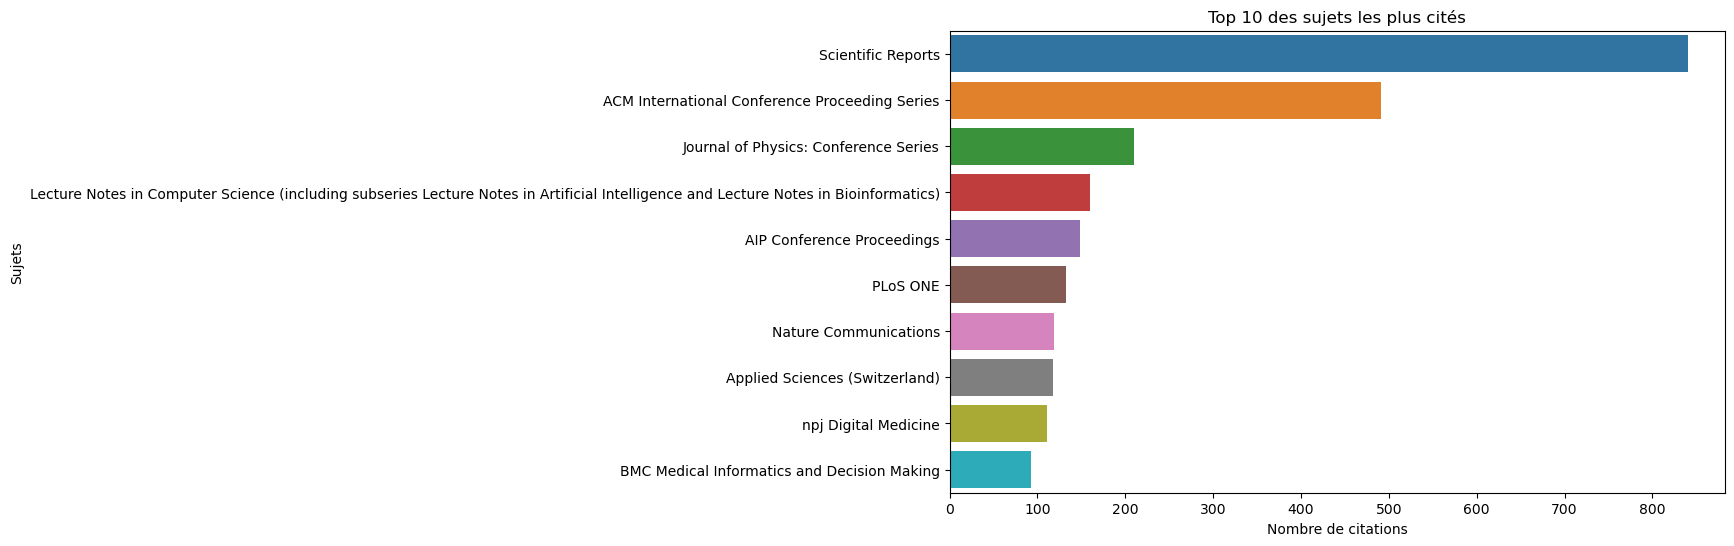

In [ ]:
# analyse avancée sur les publications

# analyse de moyen de citation par keyword
df_keyword = df.groupby('Keyword')['Citation Count'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Keyword', y='Citation Count', data=df_keyword)
plt.title('Moyenne de citations par mot-clé')
plt.xlabel('Mot-clé')
plt.ylabel('Moyenne de citations')
plt.show()

# les auteurs les plus cités
authors_series = df['Authors'].str.split(',').explode().value_counts()
top_authors = authors_series.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 des auteurs les plus cités')
plt.xlabel('Nombre de citations')
plt.ylabel('Auteurs')
plt.show()

# les auteurs les plus cités par keyword
df_keyword = df.groupby('Keyword')['Authors'].apply(lambda x: x.str.split(',').explode().value_counts().head(1)).reset_index()
df_keyword.columns = ['Keyword', 'Top Author', 'Citation Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Citation Count', y='Top Author', hue='Keyword', data=df_keyword)
plt.title('Top auteur par mot-clé')
plt.xlabel('Nombre de citations')
plt.ylabel('Auteur')
plt.show()

# les sujets les plus cités
publication_names_series = df['Publication Name'].value_counts()
top_publication_names = publication_names_series.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publication_names.values, y=top_publication_names.index)
plt.title('Top 10 des sujets les plus cités')
plt.xlabel('Nombre de citations')
plt.ylabel('Sujets')
plt.show()

